# day13 of CS 136 : Gibbs sampling for a 2D multivariate normal

## Outline

* **Part 1: Defining the conditional distributions**
* **Part 2: Writing a Gibbs sampler**
* **Part 3: Sanity check results against NumPy's built-in sampler**

## Takeaways

* Gibbs samplers are only possible if we can exactly define the conditional distributions (for some models this is easy, for many others this is quite challenging)
* When possible, Gibbs samplers are almost always a better choice than Random Walk or other proposal-based MCMC methods



# Setup

In [1]:
import numpy as np
import pandas as pd
import scipy.stats

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.25)

# Background

## Random variables

(We'll use 0-indexing so we have close alignment between math and python code)

We are interested in a 2-dimensional random variable $z = [z_0, z_1]$

Each entry $z_d$ is a real scalar: $z_d \in \mathbb{R}$

## Target distribution

Our target distribution is a multivariate Gaussian with known zero mean and a covariance matrix that establishes positive correlation between $z_0$ and $z_1$.

\begin{align}
p^*(z_0, z_1) =  \mathcal{N}\left(
    \left[ \begin{array}{c}
    0 \\ 0
    \end{array} \right],
    \left[
    \begin{array}{c c}
    1 & 0.8 \\
    0.8 & 2
    \end{array} \right] \right)
\end{align}

Our goal is to draw SAMPLES from this distribution, using the Gibbs sampling method.

Naturally, you could draw samples from this distribution just by calling `np.random.multivariate_normal` with the right mean and covariance parameters. This is simpler (of course), and we'll use this fact to *check our Gibbs sampler*, since both procedures should generate samples from the same distribution.

One way to think about what we're doing is to say, what if you were given a software library where it was easy to sample from a "univariate" normal, but not a *multivariate* normal. The Gibbs sampler here would be one way we could still draw *joint* samples.

## Gibbs Sampling algorithm sketch

To begin, we initialize the vector $z^0$ to *any valid value in the sample space*.

Then, at each iteration $t \in 0,1 , 2, \ldots$, we iteratively sample each entry of $z$ as follows:
\begin{align}
    z^{t+1}_0 &\sim p^* (z_0 | z_1 = z^t_1) \\
    z^{t+1}_1 &\sim p^* (z_1 | z_0 = z^{t+1}_0)
\end{align}

## Things to remember

This is a simple example to illustrate the idea of how Gibbs sampling works.

There are other "better" ways of sampling from a 2d normal.

# Part 1: Prepare for Gibbs sampling

## Exercise 1a: Using the code below, complete the method to sample from p(z0 | z1)

In [16]:
# First, we used Bishop textbook formulas to compute the conditional mean/var
# See Eq 2.96 and 2.97
# https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf#page=110

# Start by defining parameters of the given target distribution
mean_2 = np.zeros(2)
cov_22 = np.asarray([[1.0, 0.8], [0.8, 2.0]])
lam_22 = np.linalg.inv(cov_22)

In [27]:
# Implement Eq 2.96: Solve for the conditional variance
# Note that this is a CONSTANT no matter what value of z1 we're conditioning on

cond_v_of_z0 = 1.0 / lam_22[0,0] # grab diag entry of lam_22 relevant to 0
print(cond_v_of_z0)

0.6799999999999999


In [28]:
# Implement Eq 2.97: Solve for the conditional mean
# Note that this is a FUNCTION of the value of z1 we're conditioning on
def calc_cond_mean_of_z0(z1):
    return mean_2[0] - cond_v_of_z0 * lam_22[0,1] * z1 + cond_v_of_z0 * lam_22[0,1] * mean_2[1]

In [29]:
calc_cond_mean_of_z0(np.linspace(-1, 1, 10))

array([-0.4       , -0.31111111, -0.22222222, -0.13333333, -0.04444444,
        0.04444444,  0.13333333,  0.22222222,  0.31111111,  0.4       ])

In [30]:
def draw_z0_given_z1(z1, random_state):
    ''' Sample a value of z[0] from its conditional given z[1] 
    
    Args
    ----
    z1 : float
        Value of random variable z[1]
    random_state : numpy RandomState object
        Random number generator
    
    Returns
    -------
    z0_samp : float
        Sample from the conditional p(z[0] | z[1])
    '''

    cond_mean_of_z0 = 0.0 # TODO compute the conditional mean of z[0] given z[1]
    cond_var_of_z0  = 1.0 # TODO compute the conditional variance of z[0] given z[1]
        
    # Draw a value u from the Standard Normal (zero mean, unit variance)
    u_samp = random_state.randn()
    
    # Transform this value into a sample from Normal(mean_01, var_01)
    # Remember, if u ~ Normal(0, 1), a "standard" normal with mean 0 variance 1,
    # then using transform: x <- T(u), with T(u) = \mu + \sigma * u
    # we can say x ~ Normal(\mu, \sigma^2)
    z0_samp = u_samp # TODO update this line to perform the transformation
    return z0_samp

## Exercise 1b: Using the code below, complete the method to sample from p(z1 | z0)

Use the same process as above! Just flip the indices so you get the mean and variance for z1 instead of z0

In [31]:
def draw_z1_given_z0(z0, random_state):
    ''' Sample a value of z[1] from its conditional given z[0] 
    
    Args
    ----
    z0 : float
        Value of random variable z[0]
    random_state : numpy RandomState object
        Random number generator
    
    Returns
    -------
    z1_samp : float
        Sample from the conditional p(z[1] | z[0])
    '''
    ## First, use Bishop textbook formulas to compute conditional mean/var
    cond_mean_of_z1 = 0.0 # TODO compute the conditional mean of z[1] given z[0]
    cond_var_of_z1  = 1.0 # TODO compute the conditional variance of z[1] given z[0]
    
    
    # Draw a value u from the Standard Normal (zero mean, unit variance)
    u_samp = random_state.randn()
    
    # Transform this value into a sample from Normal(mean_01, var_01)
    # Remember, if u ~ Normal(0, 1), a "standard" normal with mean 0 variance 1,
    # then using transform: x <- T(u), with T(u) = \mu + \sigma * u
    # we can say x ~ Normal(\mu, \sigma^2)
    z1_samp = u_samp # TODO update this line to perform the transformation
    return z1_samp

# Part 2: Execute the Gibbs sampling algorithm


## Gibbs sampler algorithm

Perform 6000 iterations.

Discard the first 1000 as "not yet burned in".

In [32]:
S = 6000
sample_list = list()
z_D = np.zeros(2)

random_state = np.random.RandomState(0) # reproducible random seeds

for t in range(S):
    z_D[0] = draw_z0_given_z1(z_D[1], random_state)
    z_D[1] = draw_z1_given_z0(z_D[0], random_state)
    
    if t > 1000:
        sample_list.append(z_D.copy()) # save copies so we get different vectors

In [33]:
# convert list of samples to a 2d numpy array
z_samples_SD = np.vstack(sample_list)

## Visualize the sampled values for z0

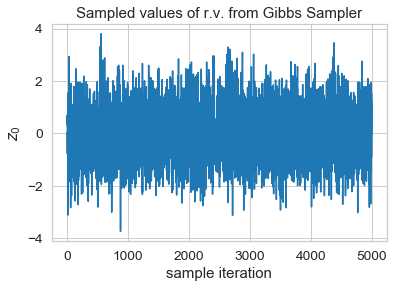

In [34]:
plt.plot(z_samples_SD[:,0])
plt.xlabel('sample iteration');
plt.ylabel('$z_0$')
plt.title('Sampled values of r.v. from Gibbs Sampler');

## Exercise 2a: Compute the empirical MEAN of your samples

You should estimate the mean of your samples, which is effectively:

$$
\frac{1}{S} \sum_{s=1}^S z^s 
$$

If your sampler is correct, and you have enough samples, you should get *very close* to the true mean of your target distribution

In [8]:
## TODO compute the mean of z_samples_SD

## Exercise 2b: Compute the empirical covariance of your samples

You should estimate the covariance of your samples, which is effectively:

$$
\frac{1}{S} \sum_{s=1}^S (z^s - \bar{z} )  (z^s - \bar{z} )^T
$$

If your sampler is correct, and you have enough samples, you should get *very close* to the true covariance of your target distribution

In [9]:
## TODO compute the covariance of z_samples_SD. Hint: use np.cov

# Part 3: Compare to samples from built-in routines for 2D MVNormal sampling

## Draw 1000 samples from target distribution using `np.random.multivariate_normal`

In [10]:
true_mu_2 = np.zeros(2)
true_cov_22 = np.asarray([[1.0, 0.8], [0.8, 2.0]])
true_samples_SD = random_state.multivariate_normal(true_mu_2, true_cov_22, size=S-1000)

## Visualize results of your Gibbs-sampler and Numpy's built-in sampler side-by-side

Do the results visually match?

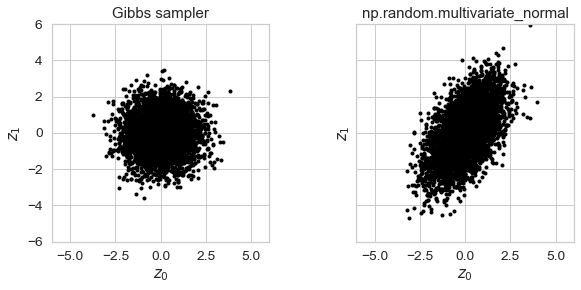

In [11]:
fig, ax_grid = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(10,4))

ax_grid[0].plot(z_samples_SD[:,0], z_samples_SD[:,1], 'k.')
ax_grid[0].set_title('Gibbs sampler')
ax_grid[0].set_aspect('equal', 'box');
ax_grid[0].set_xlabel('$z_0$');
ax_grid[0].set_ylabel('$z_1$');

ax_grid[1].plot(true_samples_SD[:,0], true_samples_SD[:,1], 'k.')
ax_grid[1].set_title('np.random.multivariate_normal')
ax_grid[1].set_aspect('equal', 'box');
ax_grid[1].set_xlim([-6, 6]);
ax_grid[1].set_ylim([-6, 6]);
ax_grid[1].set_xlabel('$z_0$');
ax_grid[1].set_ylabel('$z_1$');